# Detecção de texto em imagens com EAST detector

- Paper da técnica: https://arxiv.org/pdf/1704.03155v2.pdf

# Importando as bibliotecas

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

# Processando a imagem

In [4]:
detector = '../data/modelos/frozen_east_text_detection.pb'
largura, altura = 320, 320

In [12]:
imagem = '../data/imagens/caneca.jpg'
min_confianca = 0.9 #@param {type: 'number', min:0.0, max:1.0}

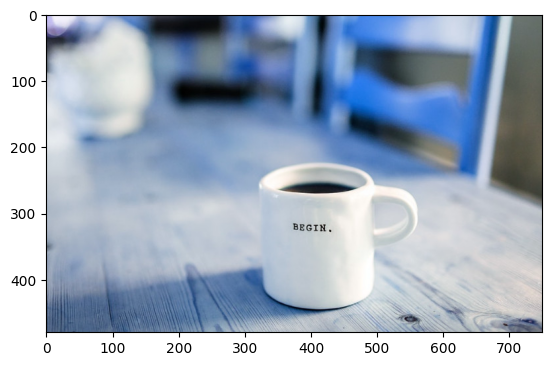

In [13]:
img = cv2.imread(imagem)
plt.imshow(img)

In [15]:
original = img.copy()

In [16]:
img.shape

(480, 750, 3)

In [17]:
H = img.shape[0]
W = img.shape[1]
print(H, W)

480 750


In [18]:
proporcao_W = W / float(largura)
proporcao_H = H / float(altura)
print(proporcao_W, proporcao_H)

2.34375 1.5


In [19]:
img = cv2.resize(img, (largura, altura))
H = img.shape[0]
W = img.shape[1]
print(H, W)

320 320


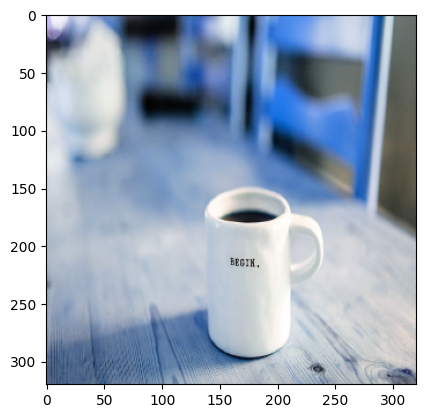

In [20]:
plt.imshow(img)

# Carregando a rede neural

In [21]:
nomes_camadas = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']

In [22]:
rede_neural = cv2.dnn.readNet(detector)

In [23]:
img.shape

(320, 320, 3)

In [24]:
blob = cv2.dnn.blobFromImage(img, 1.0, (W, H), swapRB = True, crop = False)

In [25]:
blob.shape # batch_size

(1, 3, 320, 320)

In [26]:
rede_neural.setInput(blob)
scores, geometry = rede_neural.forward(nomes_camadas)

In [27]:
scores

array([[[[1.4775183e-07, 5.3355325e-07, 6.1831190e-07, ...,
          2.3887444e-06, 2.1422467e-07, 1.9741562e-06],
         [2.2155248e-07, 8.2297476e-08, 1.5269326e-07, ...,
          3.8021703e-06, 2.4969086e-07, 2.0974837e-06],
         [2.4107598e-07, 2.5650635e-07, 6.7496660e-07, ...,
          4.4842459e-06, 6.0891395e-08, 2.5159140e-06],
         ...,
         [5.1902941e-07, 1.3470725e-07, 3.8078490e-08, ...,
          1.7954446e-06, 7.7535549e-07, 5.4700849e-06],
         [2.8565972e-07, 8.5580076e-08, 1.1289849e-07, ...,
          1.1354846e-06, 9.0157494e-07, 5.0782419e-06],
         [7.2199100e-08, 8.4333314e-09, 5.4603602e-09, ...,
          1.9142327e-07, 3.1659505e-07, 1.0240367e-07]]]], dtype=float32)

In [28]:
geometry

array([[[[ 1.54848892e+02,  1.01938675e+02,  1.08211121e+02, ...,
           1.33965591e+02,  1.27577316e+02,  1.46967972e+02],
         [ 1.19407852e+02,  6.46941986e+01,  7.18581772e+01, ...,
           9.02676010e+01,  8.52865829e+01,  1.03320297e+02],
         [ 1.22548691e+02,  6.90612030e+01,  7.86800308e+01, ...,
           1.06369835e+02,  1.01670235e+02,  1.14973686e+02],
         ...,
         [ 1.16457314e+02,  4.99966507e+01,  3.75176544e+01, ...,
           8.21259842e+01,  8.12639847e+01,  1.21695618e+02],
         [ 1.27623383e+02,  5.88199654e+01,  4.84033051e+01, ...,
           8.31772232e+01,  8.09340973e+01,  1.11183907e+02],
         [ 1.26661522e+02,  7.53629608e+01,  6.93248215e+01, ...,
           1.27025345e+02,  1.18697968e+02,  1.47223724e+02]],

        [[ 1.09559761e+02,  9.52128754e+01,  9.08699265e+01, ...,
           1.00495575e+02,  9.43882065e+01,  1.12618622e+02],
         [ 8.27181091e+01,  5.77866745e+01,  5.62353096e+01, ...,
           6.53349609e

In [29]:
geometry[0,0,0]

array([154.84889 , 101.938675, 108.21112 , 110.35279 , 111.58001 ,
       113.07217 , 114.39852 , 116.147514, 115.30821 , 115.90372 ,
       117.41568 , 118.78156 , 116.54512 , 116.346   , 121.443306,
       129.47717 , 137.60803 , 143.02376 , 146.83208 , 149.02917 ,
       149.08723 , 148.28302 , 147.13014 , 145.16956 , 143.07384 ,
       140.95242 , 138.77011 , 137.29422 , 134.19771 , 131.39842 ,
       129.34822 , 127.54958 , 126.74279 , 125.23266 , 120.42207 ,
       117.427284, 116.221695, 116.09968 , 116.904205, 118.21094 ,
       119.18676 , 123.20284 , 125.417755, 126.3855  , 126.154854,
       126.19303 , 126.85886 , 126.928   , 128.21808 , 128.5202  ,
       128.97592 , 129.40462 , 130.3091  , 130.73267 , 130.80646 ,
       130.30138 , 129.3221  , 127.84739 , 126.378006, 125.06283 ,
       124.117935, 123.3759  , 122.265175, 120.858215, 120.00342 ,
       119.06399 , 117.834206, 116.9943  , 115.74399 , 117.56077 ,
       119.88263 , 121.395935, 125.46854 , 121.87916 , 120.994

In [30]:
scores.shape

(1, 1, 80, 80)

In [31]:
scores.shape[2:4]

(80, 80)

In [32]:
linhas, colunas = scores.shape[2:4]

In [33]:
print(linhas, colunas)

80 80


In [34]:
caixas = []
confiancas = []

# Decodificando os valores

- Explicação sobre os [valores de geometria](https://stackoverflow.com/questions/55583306/decoding-geometry-output-of-east-text-detection)

In [35]:
def dados_geometricos(geometry, y):
  xData0 = geometry[0, 0, y]
  xData1 = geometry[0, 1, y]
  xData2 = geometry[0, 2, y]
  xData3 = geometry[0, 3, y]
  data_angulos = geometry[0, 4, y]
  return data_angulos, xData0, xData1, xData2, xData3

In [36]:
def calculos_geometria(data_angulos, xData0, xData1, xData2, xData3):
  (offsetX, offsetY) = (x * 4.0, y * 4.0)
  angulo = data_angulos[x]
  cos = np.cos(angulo)
  sin = np.sin(angulo)
  h = xData0[x] + xData2[x]
  w = xData1[x] + xData3[x]

  fimX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
  fimY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))

  inicioX = int(fimX - w)
  inicioY = int(fimY - h)

  return inicioX, inicioY, fimX, fimY

In [37]:
linhas, colunas

(80, 80)

In [38]:
scores[0, 0, 0]

array([1.4775183e-07, 5.3355325e-07, 6.1831190e-07, 5.4498480e-07,
       6.8389460e-07, 6.3538363e-07, 2.8739106e-07, 1.1796508e-07,
       1.4145149e-07, 1.9870522e-07, 1.9250447e-07, 1.7849250e-07,
       3.2116756e-07, 1.1000186e-06, 1.8538535e-06, 7.2049903e-07,
       2.2694773e-07, 1.9305345e-07, 2.7782812e-07, 4.6434533e-07,
       5.4333816e-07, 6.3162935e-07, 6.5712828e-07, 6.7843467e-07,
       6.9376136e-07, 5.5208506e-07, 4.2479184e-07, 3.1016791e-07,
       4.7803371e-07, 4.5292870e-07, 5.1470943e-07, 5.0100130e-07,
       3.5401621e-07, 4.9244062e-07, 2.2611391e-06, 3.2066059e-06,
       2.2184138e-06, 1.9173272e-06, 1.9552849e-06, 2.5295287e-06,
       3.1743598e-06, 2.3743835e-06, 3.7373130e-07, 5.9925412e-08,
       7.6657173e-08, 1.3193031e-07, 1.9002201e-07, 3.2695496e-07,
       1.9928707e-07, 1.4942634e-07, 2.1175209e-07, 2.1544535e-07,
       2.3616482e-07, 3.0993047e-07, 3.7835929e-07, 4.7277859e-07,
       6.3466234e-07, 8.9479857e-07, 1.0728420e-06, 9.4951156e

In [39]:
for y in range(0, linhas):
  #print(y)
  data_scores = scores[0, 0, y]

  data_angulos, xData0, xData1, xData2, xData3 = dados_geometricos(geometry, y)

  for x in range(0, colunas):
    if data_scores[x] < min_confianca:
      continue

    inicioX, inicioY, fimX, fimY = calculos_geometria(data_angulos, xData0, xData1, xData2, xData3)
    confiancas.append(data_scores[x])
    caixas.append((inicioX, inicioY, fimX, fimY))

In [40]:
confiancas

[np.float32(0.9995617),
 np.float32(0.99982554),
 np.float32(0.9997718),
 np.float32(0.9994678),
 np.float32(0.96625125),
 np.float32(0.96421045),
 np.float32(0.9993309),
 np.float32(0.99968016),
 np.float32(0.99951243)]

In [41]:
caixas

[(156, 208, 190, 220),
 (157, 208, 187, 220),
 (157, 208, 186, 220),
 (158, 207, 186, 220),
 (156, 207, 187, 221),
 (157, 207, 188, 220),
 (158, 208, 187, 221),
 (158, 208, 187, 221),
 (157, 208, 188, 221)]

In [42]:
deteccoes = non_max_suppression(np.array(caixas), probs=confiancas)

In [43]:
deteccoes

array([[157, 208, 187, 220]])

In [44]:
proporcao_H, proporcao_W

(1.5, 2.34375)

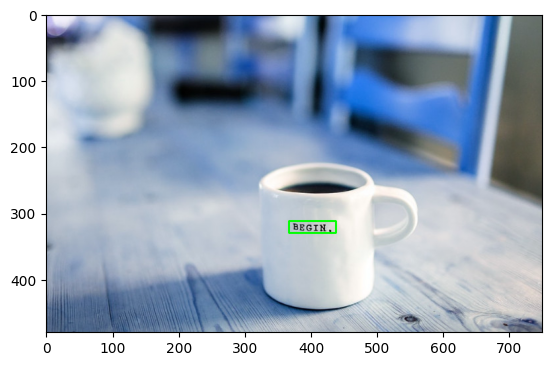

In [46]:
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  #print(inicioX, inicioY, fimX, fimY)
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  # region of interest
  roi = copia[inicioY:fimY, inicioX:fimX]

  cv2.rectangle(original, (inicioX, inicioY), (fimX, fimY), (0,255,0), 2)
plt.imshow(original)

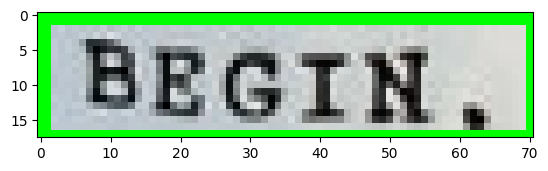

In [47]:
plt.imshow(roi)

In [48]:
roi = cv2.resize(roi, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

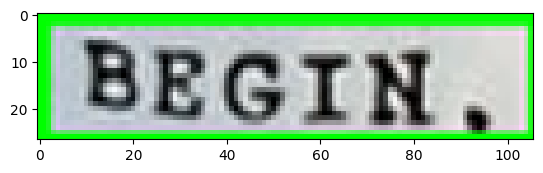

In [49]:
plt.imshow(roi)

# Reconhecimento do texto

In [50]:
import pytesseract

*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [51]:
config_tesseract = "--tessdata-dir tessdata --psm 7"

BEGIN,



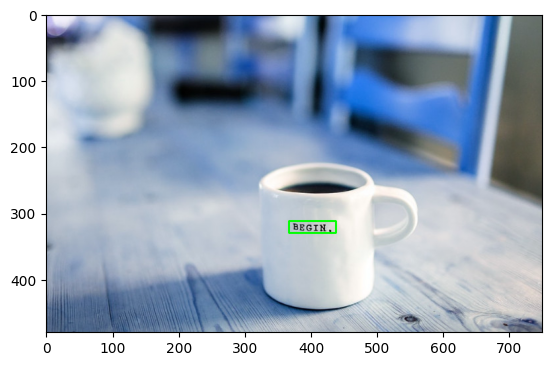

In [53]:
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  roi = copia[inicioY:fimY, inicioX:fimX]
  texto = pytesseract.image_to_string(roi, lang='por', config=config_tesseract)
  print(texto)

  cv2.rectangle(original, (inicioX, inicioY), (fimX, fimY), (0,255,0), 2)
plt.imshow(original)

## Expandindo o ROI do texto

BEGIN,



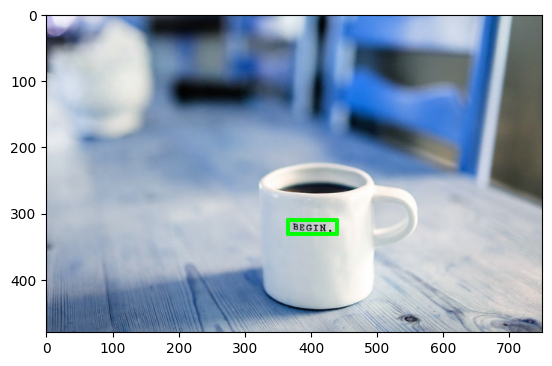

In [55]:
margem = 3
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  roi = copia[inicioY - margem:fimY + margem, inicioX - margem:fimX + margem]
  plt.imshow(roi)
  texto = pytesseract.image_to_string(roi, lang='por', config=config_tesseract)
  print(texto)

  cv2.rectangle(copia, (inicioX - margem, inicioY - margem), (fimX + margem, fimY + margem), (0,255,0), 2)
plt.imshow(copia)